In [1]:
#import 
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#insert filepath 
crime_data = Path("Crime_Data_from_2020_to_Present.csv")
#read csv file using pandas 
crime_df = pd.read_csv(crime_data)
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
#view all columns 
crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [4]:
#reduced dataframe to all neccesary column 
reduced_crime_df = crime_df.loc[:,["AREA NAME", "DATE OCC", "TIME OCC","Crm Cd Desc"]]
reduced_crime_df.head()

#converting datetime 
reduced_crime_df["DATE OCC"] = pd.to_datetime(reduced_crime_df["DATE OCC"])

In [5]:
#drop duplicate
reduced_crime_df= reduced_crime_df.drop_duplicates()

In [6]:
# Handle outliers (example: remove rows with crime count > 99th percentile)
crime_counts = reduced_crime_df[ "Crm Cd Desc"].value_counts()
threshold = crime_counts.quantile(0.99)
crime_counts_filtered = crime_counts[crime_counts <= threshold]
reduced_crime_df = reduced_crime_df[reduced_crime_df["Crm Cd Desc"].isin(crime_counts_filtered.index)]

In [7]:
#narrowing down data to just Central area and converted it into a dataframe
central_data = reduced_crime_df[reduced_crime_df["AREA NAME"]=="Central"]
central_data 


,AREA NAME,DATE OCC,TIME OCC,Crm Cd Desc
2,Central,2020-02-13,1200,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
5,Central,2020-01-01,30,"RAPE, FORCIBLE"
6,Central,2020-01-02,1315,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
7,Central,2020-01-04,40,OTHER MISCELLANEOUS CRIME
8,Central,2020-01-04,200,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
...,...,...,...,...
712699,Central,2023-01-11,1750,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT
712726,Central,2023-03-17,2100,PICKPOCKET
712766,Central,2023-03-03,1058,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
712769,Central,2023-04-10,720,TRESPASSING


Top 5 Crimes:
                                                    Crm Cd Desc
BURGLARY FROM VEHICLE                                      6188
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...         3313
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             2860
THEFT PLAIN - PETTY ($950 & UNDER)                         2818
ROBBERY                                                    2035




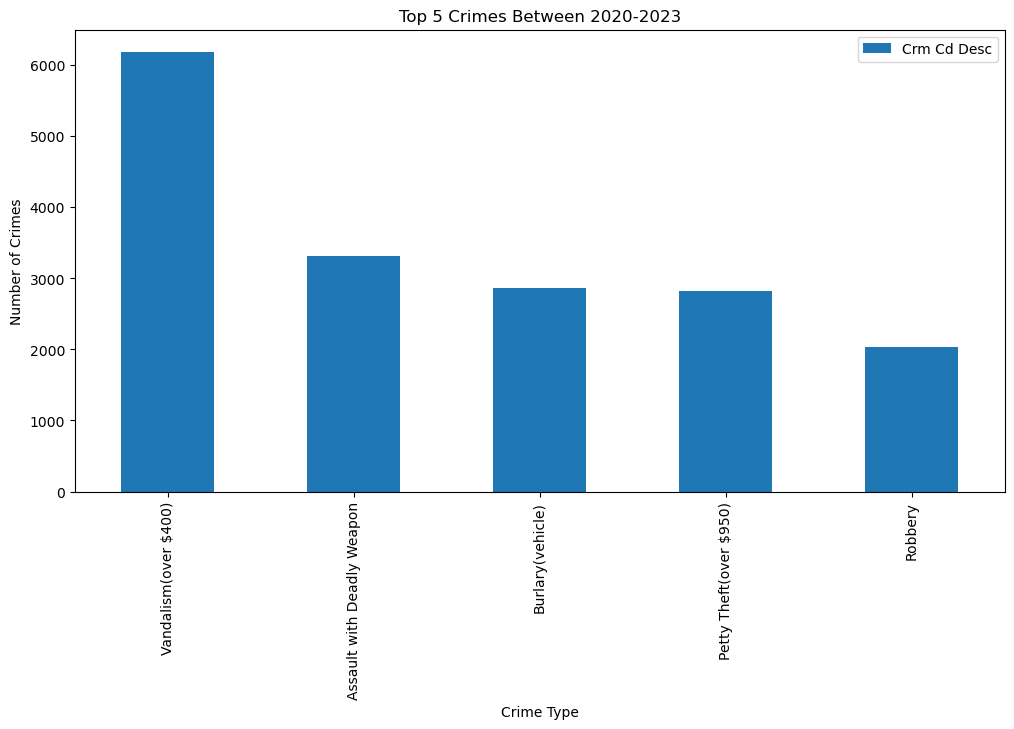

In [8]:
##Creating Visualization 

# Top 5 overall crime to a list 
top_5_crimes_overall = central_data["Crm Cd Desc"].value_counts().head(5)
top_5_crimes_overall

#chart to represent the top 5 crime
print("Top 5 Crimes:")
print(pd.DataFrame(top_5_crimes_overall))
print("\n")

#plot bar chart
overall_crime_counts_df = pd.DataFrame(top_5_crimes_overall)
overall_crime_counts_df.plot(kind="bar", figsize=(12, 6))

#chart properties 
plt.title("Top 5 Crimes Between 2020-2023")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
x_tick_labels = {'Burlary(vehicle)','Vandalism(over $400)','Petty Theft(over $950)','Assault with Deadly Weapon', 'Robbery'}
plt.gca().set_xticklabels(x_tick_labels)

#save fig to PNG 
plt.savefig("top5_overall.png",bbox_inches='tight')
plt.show()


Top 5 Crimes vs Years:
                                                    2020  2021  2022
BURGLARY FROM VEHICLE                               1152  1584  2717
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   903   989  1108
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       722   852   989
THEFT PLAIN - PETTY ($950 & UNDER)                   721   886   940
ROBBERY                                              468   669   689




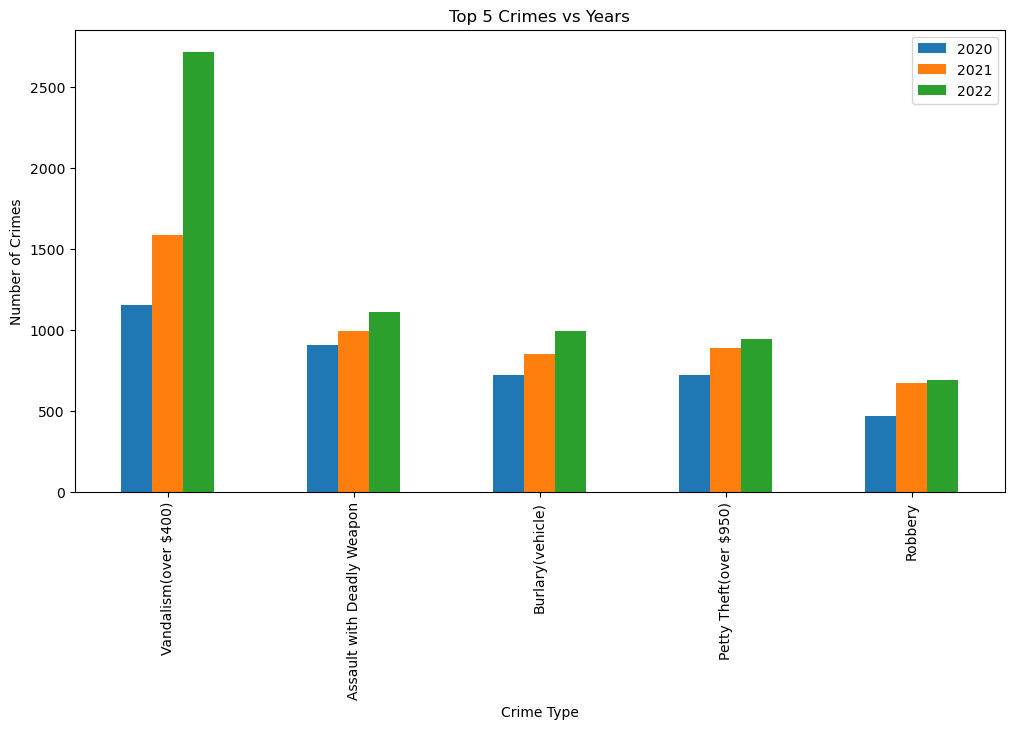

In [9]:
#create df for each year from 2020-2023 
years =[2020,2021,2022]
data_by_year = {year: central_data[central_data["DATE OCC"].dt.year == year] for year in years}

#top 5 overall to list 
top_5_crimes_overall = central_data["Crm Cd Desc"].value_counts().head(5).index.to_list()
top_5_crimes_overall

# Calculate the number of top 5 crimes by year
crime_counts_by_year = {}
for year, crimes in data_by_year.items():
    crime_counts_by_year[year] = crimes["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

# Print the table for the bar chart
print("Top 5 Crimes vs Years:")
print(pd.DataFrame(crime_counts_by_year))
print("\n")

# Plot the bar chart
yearly_crime_counts_df = pd.DataFrame(crime_counts_by_year)
yearly_crime_counts_df.plot(kind="bar", figsize=(12, 6))

#chart properties
plt.title("Top 5 Crimes vs Years")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
x_tick_labels = {'Burlary(vehicle)','Vandalism(over $400)','Petty Theft(over $950)','Assault with Deadly Weapon', 'Robbery'}
plt.gca().set_xticklabels(x_tick_labels)

#save image to PNG file
plt.savefig("Central_Year_top5.png",bbox_inches='tight')
plt.show()



Top 5 Crimes vs Month (2020 - 2022):
Crm Cd Desc  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
DATE OCC                                                      
2020-01                                                  58   
2020-02                                                  48   
2020-03                                                  49   
2020-04                                                  55   
2020-05                                                  61   
2020-06                                                  61   
2020-07                                                  58   
2020-08                                                  68   
2020-09                                                  68   
2020-10                                                  70   
2020-11                                                  56   
2020-12                                                  70   
2021-01                                                  57   
2021-02           

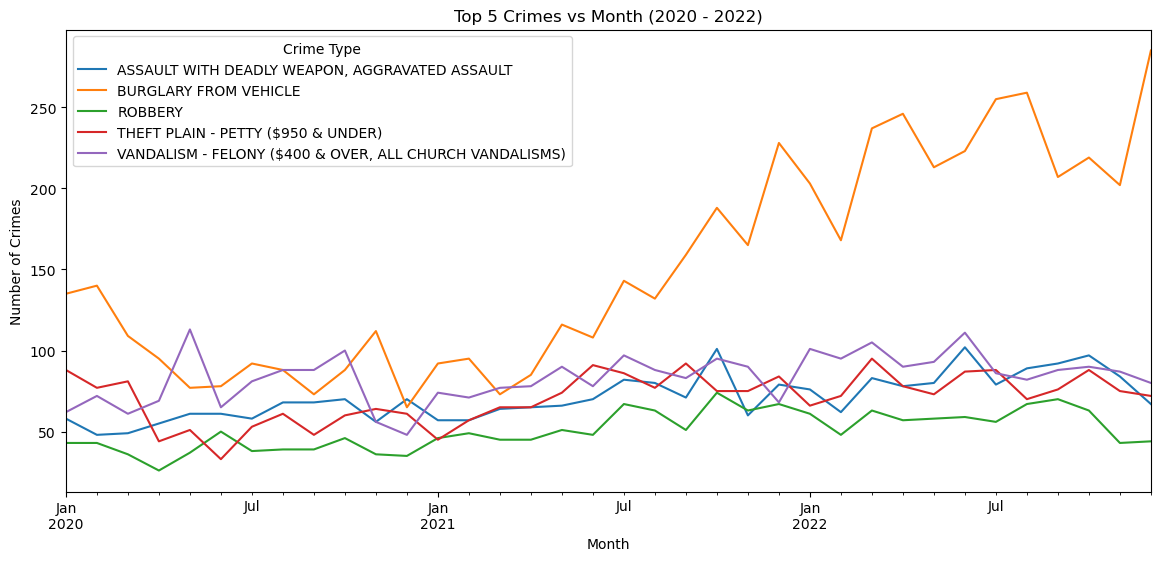

In [10]:
#Top 5 crimes vs month (Line chart)
top_5_crimes_overall = central_data["Crm Cd Desc"].value_counts().head(5).index.tolist()
top_5_crimes_data = central_data[central_data["Crm Cd Desc"].isin(top_5_crimes_overall)]

# Limit data to the end of 2020 for even comparison 
top_5_crimes_data = top_5_crimes_data[top_5_crimes_data['DATE OCC'].dt.year < 2023]
crimes_by_month = top_5_crimes_data.groupby([top_5_crimes_data["DATE OCC"].dt.to_period("M"), "Crm Cd Desc"]).size().unstack().fillna(0)

# Print the table for the line chart
print("Top 5 Crimes vs Month (2020 - 2022):")
print(crimes_by_month)
print("\n")

# Plot the line chart
fig, ax = plt.subplots(figsize=(14, 6))
crimes_by_month.plot(ax=ax)
plt.title("Top 5 Crimes vs Month (2020 - 2022)")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type")

#save image to PNG file 
plt.savefig('Monthly_Top5_analysis.png')
plt.show()


In [11]:
#Crimes vs Socialeconomic 
pre_covid_period = (reduced_crime_df["DATE OCC"] < "2020-03-01")
during_covid_period = (reduced_crime_df["DATE OCC"] >= "2020-03-01") & (reduced_crime_df["DATE OCC"] <= "2021-12-31")
post_covid_period = (reduced_crime_df["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (reduced_crime_df["DATE OCC"] >= "2022-01-01") & (reduced_crime_df["DATE OCC"] <= "2022-12-31")
post_inflation_period = (reduced_crime_df["DATE OCC"] > "2022-12-31")

pre_covid_crime_counts = reduced_crime_df[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]
during_covid_crime_counts = reduced_crime_df[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]
post_covid_crime_counts = reduced_crime_df[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]
during_inflation_crime_counts = reduced_crime_df[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]
post_inflation_crime_counts = reduced_crime_df[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes_overall]

#create data for each df 
crime_counts_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_crime_counts,
    "During COVID": during_covid_crime_counts,
    "Post-COVID": post_covid_crime_counts,
    "During Inflation": during_inflation_crime_counts,
    "Post-Inflation": post_inflation_crime_counts})



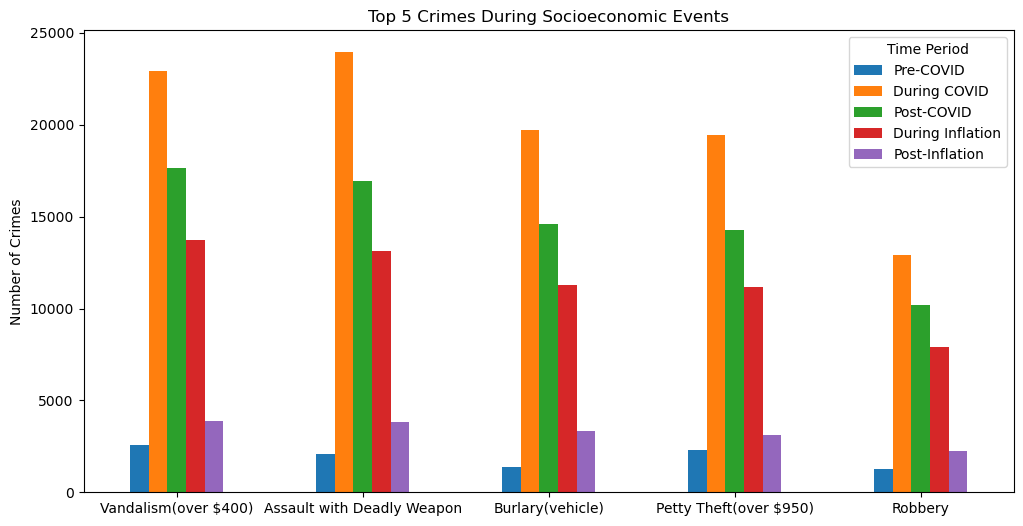

In [12]:
#chart properties
ax = crime_counts_by_period.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Number of Crimes")
ax.set_title("Top 5 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_5_crimes_overall)), top_5_crimes_overall)
plt.legend(title="Time Period")
x_tick_labels = {'Burlary(vehicle)','Vandalism(over $400)','Petty Theft(over $950)','Assault with Deadly Weapon', 'Robbery'}
plt.gca().set_xticklabels(x_tick_labels)

#save figure to PNG 
plt.savefig("Top3_socialeconomic.png",bbox_inches='tight')
plt.show()

In [13]:

top_3_crimes = reduced_crime_df["Crm Cd Desc"].value_counts().head(3).index.tolist()

# Calculate the total count of all crimes
total_count = len(reduced_crime_df)

# Calculate the count of each top 3 crime
top_3_counts = reduced_crime_df[reduced_crime_df["Crm Cd Desc"].isin(top_3_crimes)].groupby("Crm Cd Desc").size()

# Calculate the percentage for each top 3 crime
top_3_percentages = (top_3_counts / total_count) * 100

# Print the percentages
for crime, percentage in top_3_percentages.items():
    print(f"{crime}: {percentage:.2f}%")


BURGLARY FROM VEHICLE: 7.71%
THEFT OF IDENTITY: 7.77%
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS): 7.68%


In [14]:
#top 5 crime 
top_5_crimes = reduced_crime_df["Crm Cd Desc"].value_counts().head(5).index.tolist()
print(top_5_crimes)

#Crimes vs Socialeconomic 
pre_covid_period = (reduced_crime_df["DATE OCC"] < "2020-03-01")
during_covid_period = (reduced_crime_df["DATE OCC"] >= "2020-03-01") & (reduced_crime_df["DATE OCC"] <= "2021-12-31")
post_covid_period = (reduced_crime_df["DATE OCC"] > "2021-12-31")

# Adjust the inflation periods if needed
during_inflation_period = (reduced_crime_df["DATE OCC"] >= "2022-01-01") & (reduced_crime_df["DATE OCC"] <= "2022-12-31")
post_inflation_period = (reduced_crime_df["DATE OCC"] > "2022-12-31")


#calculate the total count during the timeframe 
pre_covid_total_count = len(pre_covid_period)
during_covid_total_count = len(during_covid_period)
post_covid_total_count = len(post_covid_period)
during_inflation_total_count = len(during_inflation_period)
post_inflation_total_count = len(post_inflation_period)

#total count of top 5 crime 
top5_count = reduced_crime_df["Crm Cd Desc"].value_counts().loc[top_5_crimes]
print(top5_count)

#calculate the crime count during the timeframe
pre_covid_crime_counts = reduced_crime_df[pre_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
during_covid_crime_counts = reduced_crime_df[during_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
post_covid_crime_counts = reduced_crime_df[post_covid_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
during_inflation_crime_counts = reduced_crime_df[during_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]
post_inflation_crime_counts = reduced_crime_df[post_inflation_period]["Crm Cd Desc"].value_counts().loc[top_5_crimes]



['THEFT OF IDENTITY', 'BURGLARY FROM VEHICLE', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 'BURGLARY', 'THEFT PLAIN - PETTY ($950 & UNDER)']
THEFT OF IDENTITY                                          43495
BURGLARY FROM VEHICLE                                      43143
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    43013
BURGLARY                                                   42263
THEFT PLAIN - PETTY ($950 & UNDER)                         36050
Name: Crm Cd Desc, dtype: int64


                                                    Pre-COVID  During COVID  \
THEFT OF IDENTITY                                    0.286504      3.074378   
BURGLARY FROM VEHICLE                                0.462443      4.091967   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   0.376170      4.277373   
BURGLARY                                             0.348127      3.987654   
THEFT PLAIN - PETTY ($950 & UNDER)                   0.410822      3.477341   

                                                    Post-COVID  \
THEFT OF IDENTITY                                     4.408121   
BURGLARY FROM VEHICLE                                 3.151720   
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...    3.029367   
BURGLARY                                              3.213165   
THEFT PLAIN - PETTY ($950 & UNDER)                    2.551027   

                                                    During Inflation  \
THEFT OF IDENTITY                                       

<function matplotlib.pyplot.show(close=None, block=None)>

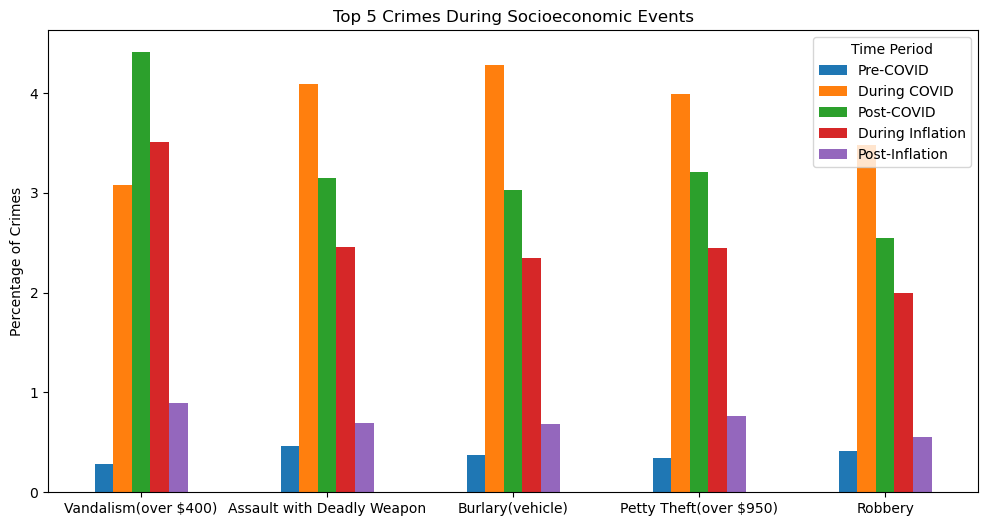

In [15]:
#calculate the percentage, comparing crime count and total crime count during the time period
pre_covid_percentages = (pre_covid_crime_counts / pre_covid_total_count) * 100
during_covid_percentages = (during_covid_crime_counts / during_covid_total_count) * 100
post_covid_percentages= (post_covid_crime_counts / post_covid_total_count) * 100
during_inflation_percentages = (during_inflation_crime_counts / during_inflation_total_count) * 100
post_inflation_percentages = (post_inflation_crime_counts / post_inflation_total_count) * 100

#input it into df 
crime_percentage_by_period = pd.DataFrame({
    "Pre-COVID": pre_covid_percentages,
    "During COVID": during_covid_percentages,
    "Post-COVID": post_covid_percentages,
    "During Inflation": during_inflation_percentages,
    "Post-Inflation": post_inflation_percentages})

print(crime_percentage_by_period)

#plot and changer properties of the bar chart
ax = crime_percentage_by_period.plot.bar(rot=0, figsize=(12, 6))
ax.set_ylabel("Percentage of Crimes")
ax.set_title("Top 5 Crimes During Socioeconomic Events")
plt.xticks(range(len(top_5_crimes_overall)), top_5_crimes_overall)
plt.legend(title="Time Period")
x_tick_labels = {'Burlary(vehicle)','Vandalism(over $400)','Petty Theft(over $950)','Assault with Deadly Weapon', 'Robbery'}
plt.gca().set_xticklabels(x_tick_labels)

#save fig to PNG
plt.savefig("Top 5 Socioeconmic Events")

plt.show

/var/folders/3x/2bxs9yvs0zzgqflxm00s171w0000gn/T/ipykernel_86964/3448066178.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_data['day'] = central_data["TIME OCC"].apply(is_day)
/var/folders/3x/2bxs9yvs0zzgqflxm00s171w0000gn/T/ipykernel_86964/3448066178.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_data['night'] = central_data['TIME OCC'].apply(is_night)


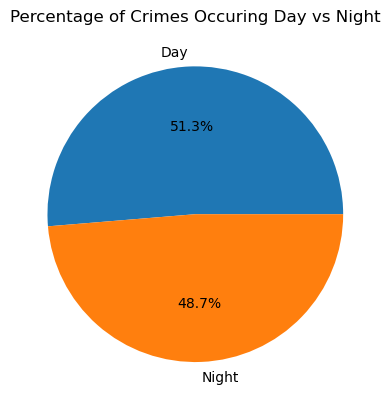

In [16]:
# compare crimes occuring day vs night
# Function to determine if a time value is within the day/night range
def is_day(time):
    time_str = str(time).zfill(4)  # Convert to string and pad with leading zeros
    return (time_str >= '0600') and (time_str <= '1759')

def is_night(time):
    time_str = str(time).zfill(4)  # Convert to string and pad with leading zeros
    return (time_str >= '1800') or (time_str <= '0559')

# Sort the data into "day" and "night" columns
central_data['day'] = central_data["TIME OCC"].apply(is_day)
central_data['night'] = central_data['TIME OCC'].apply(is_night)

# Calculate the crimes count  during the day and night
day_count = central_data[central_data['day']].shape[0]
night_count = central_data[central_data['night']].shape[0]

#calculate percentage
day_percentage = day_count / (day_count + night_count) * 100
night_percentage = night_count / (day_count + night_count) * 100

# Create a pie chart for the percentage of crimes during day
plt.pie([day_percentage, night_percentage], labels=['Day', 'Night'], autopct='%1.1f%%')
plt.title('Percentage of Crimes Occuring Day vs Night')

#save fig to PGN 
plt.savefig("Days and Night comparison")
plt.show()